 Installing opencv 
 

In [4]:
pip install opencv-python

     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     --------------------------------------- 0.0/38.2 MB 640.0 kB/s eta 0:01:00
     --------------------------------------- 0.0/38.2 MB 640.0 kB/s eta 0:01:00
     --------------------------------------- 0.0/38.2 MB 640.0 kB/s eta 0:01:00
     --------------------------------------- 0.1/38.2 MB 581.0 kB/s eta 0:01:06
     --------------------------------------- 0.1/38.2 MB 581.0 kB/s eta 0:01:06
     --------------------------------------- 0.2/38.2 MB 737.3 kB/s eta 0:00:52
     --------------------------------------- 0.2/38.2 MB 655.1 kB/s eta 0:00:58
     --------------------------------------- 0.2/38.2 MB 655.1 kB/s eta 0:00:58
     --------------------------------------- 0.2/38.2 MB 625.1 kB/s eta 0:01:01
     --------------------------------------- 0.2/38.2 MB 625.1 kB/s eta 0:01:01
     --------------------------------------- 0.3/38.2 MB 586.4 kB/s eta 0:01:05
     --------------------------------------- 0.3

To create dataset of our own.. the code below will click 100 images and crop it to frame the face only!

In [8]:
import cv2
import numpy as np

# Load HAAR face classifier
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Load functions
def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces == ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]

    return cropped_face
# Initialize Webcam
cap = cv2.VideoCapture(0)
count = 0

# Collect 100 samples of your face from webcam input
while True:

    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))
        #face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

        # Save file in specified directory with unique name
        file_name_path = './Images/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)

        # Put count on images and display live count
        cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Face Cropper', face)
        
    else:
        print("Face not found")
        pass

    if cv2.waitKey(1) == 13 or count == 100: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not f

Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not f

KeyboardInterrupt: 

pip install keras

In [2]:
!pip install keras

     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
      --------------------------------------- 0.0/1.7 MB ? eta -:--:--
      --------------------------------------- 0.0/1.7 MB ? eta -:--:--
     -- ------------------------------------- 0.1/1.7 MB 744.7 kB/s eta 0:00:03
     -- ------------------------------------- 0.1/1.7 MB 744.7 kB/s eta 0:00:03
     --- ------------------------------------ 0.1/1.7 MB 652.5 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.7 MB 615.9 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.7 MB 615.9 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.7 MB 615.9 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.7 MB 615.9 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.7 MB 615.9 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.7 MB 615.9 kB/s eta 0:00:03
     ---- ----------------------------------- 0.2/1.7 MB 327.4 kB/s

Importing all the required libraries!

CREATING OUR OWN MODEL FOR FACE RECOGNITION

In [9]:
import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

C:\Users\Sailesh\AppData\Local\Temp\ipykernel_24616\2768410961.py:65: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
5/5 [==============================] - 79s 17s/step - loss: 1.9941 - accuracy: 0.3869 - val_loss: 1.6307 - val_accuracy: 0.4453
Epoch 2/5
5/5 [==============================] - 89s 20s/step - loss: 1.1760 - accuracy: 0.5693 - val_loss: 0.7162 - val_accuracy: 0.6350
Epoch 3/5
5/5 [==============================] - 82s 20s/step - loss: 0.5449 - accuracy: 0.7737 - val_loss: 0.2644 - val_accuracy: 0.9416
Epoch 4/5
5/5 [==============================] - 77s 17s/step - loss: 0.3280 - accuracy: 0.8978 - val_loss: 0.2750 - val_accuracy: 0.8978
Epoch 5/5
5/5 [==============================] - 78s 17s/step - loss: 0.2120 - accuracy: 0.9197 - val_loss: 0.0915 - val_accuracy: 0.9927


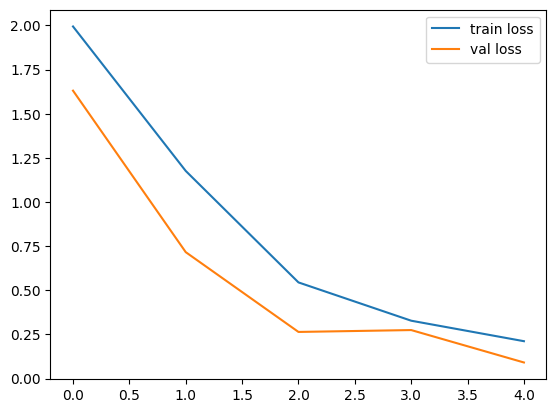

<Figure size 640x480 with 0 Axes>

In [15]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'dataset/train'
valid_path = 'dataset/test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('dataset/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
# plt.plot(r.history['acc'], label='train acc')
# plt.plot(r.history['val_acc'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model_new_4_classes.h5')

We save the model for future use!

In [16]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model_new_4_classes.h5')


In [32]:
##Now we open the webcam and capture the face from it and recognition the photo!

# Face Recognition

# Importing the libraries
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json
import random
import cv2
from keras.models import load_model
import numpy as np
import tensorflow as tf
import numpy as np

from keras.preprocessing import image
model =  tf.keras.models.load_model('facefeatures_new_model_new_4_classes.h5')

# Loading the cascades
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    # Function detects faces and returns the cropped face
    # If no face detected, it returns the input image
    
    #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    #canvas = detect(gray, frame)
    #image, face =face_detector(frame)
    
    face=face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224, 224))
        im = Image.fromarray(face, 'RGB')
           #Resizing into 128x128 because we trained the model with this image size.
        img_array = np.array(im)
                    #Our keras model used a 4D tensor, (images x height x width x channel)
                    #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        print(pred)
                     
        name="None matching"
        if(np.argmax(pred[0])==0):
            name='messi'
        elif(np.argmax(pred[0])==1):
            name='sharapova'
        elif(np.argmax(pred[0])==2):
            name='fedrar'
        elif(np.argmax(pred[0])==3):
            name='virat'
#         if(pred[0][0]>0.5):
#             name='messi'
#         elif(pred[0][1]>0.5):
#             name='sharapova'
# #         elif(pred[0][4]>0.5):
# #             name='virat'
#         elif(pred[0][3]>0.5):
#             name='virat'
#         elif(pred[0][2]>0.5):
#             name='fedrar'
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.putText(frame,name, (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()

       



<>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Sailesh\AppData\Local\Temp\ipykernel_24616\1365738905.py:36: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


1/1 [==============================] - 1s 541ms/step
[[1.0427691e-26 0.0000000e+00 1.0000000e+00 2.7017697e-13]]
1/1 [==============================] - 0s 477ms/step
[[4.2743678e-16 0.0000000e+00 1.0000000e+00 1.1258221e-18]]
1/1 [==============================] - 0s 471ms/step
[[7.7627828e-06 0.0000000e+00 9.9999225e-01 2.5441681e-22]]
1/1 [==============================] - 0s 463ms/step
[[1.6036758e-01 0.0000000e+00 8.3963245e-01 9.3918179e-17]]
1/1 [==============================] - 0s 465ms/step
[[3.5399997e-03 0.0000000e+00 9.9646002e-01 5.0556538e-16]]
1/1 [==============================] - 0s 492ms/step
[[9.9966300e-01 0.0000000e+00 3.3703892e-04 6.6130241e-14]]
1/1 [==============================] - 0s 470ms/step
[[1.0000000e+00 0.0000000e+00 1.0652253e-08 1.7884263e-13]]
1/1 [==============================] - 0s 472ms/step
[[1.0000000e+00 0.0000000e+00 1.9087961e-08 4.4052085e-16]]
1/1 [==============================] - 0s 475ms/step
[[9.999999e-01 0.000000e+00 6.094310e-08 1.

[[4.3628896e-27 0.0000000e+00 2.8176470e-11 1.0000000e+00]]
1/1 [==============================] - 1s 609ms/step
[[3.8640972e-27 0.0000000e+00 2.9758534e-14 1.0000000e+00]]
1/1 [==============================] - 1s 673ms/step
[[2.3969014e-21 2.7662854e-38 4.2824390e-12 1.0000000e+00]]
1/1 [==============================] - 1s 625ms/step
[[9.698914e-24 0.000000e+00 7.288815e-12 1.000000e+00]]
1/1 [==============================] - 1s 648ms/step
[[1.2586052e-21 0.0000000e+00 5.4043806e-08 1.0000000e+00]]
1/1 [==============================] - 1s 604ms/step
[[9.7665073e-20 2.2069675e-36 8.1679277e-02 9.1832072e-01]]
1/1 [==============================] - 1s 651ms/step
[[1.1249386e-03 8.0228871e-22 1.1836591e-09 9.9887508e-01]]
1/1 [==============================] - 1s 721ms/step
[[1.5578945e-25 0.0000000e+00 8.8548136e-12 1.0000000e+00]]
1/1 [==============================] - 1s 707ms/step
[[1.0075738e-23 0.0000000e+00 2.0380928e-09 1.0000000e+00]]
1/1 [==============================] - 1